### Connect to google drive

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Move to project folder

In [65]:
%cd "/content/drive/MyDrive/Hung/Banknote_Recognition"


/content/drive/MyDrive/Hung/Banknote_Recognition


### Validate annotation files within an object detection dataset that uses the YOLO format.

In [66]:
import os
import yaml
from pathlib import Path

def validate_yolo_annotation(file_path, num_classes):
    """
    Checking whether annotation file is truly in YOLO format
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            return False

        # Basic check if conversion to float is possible
        try:
            class_id_f, x, y, w, h = map(float, parts)
        except ValueError:
            return False # Cannot convert one of the parts to float

        # Check if class_id is a non-negative integer and within range
        # Check if coordinates and dimensions are within [0, 1]
        if not (0 <= class_id_f < num_classes and class_id_f == int(class_id_f) and
                0.0 <= x <= 1.0 and 0.0 <= y <= 1.0 and
                0.0 <= w <= 1.0 and 0.0 <= h <= 1.0):
            return False

    return True

def check_annotations(yaml_path):
    """
    Check all annotation files in dataset
    """
    # Read the YAML file
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)

    # Get the number of classes
    num_classes = len(data['names'])

    # Get the base path
    base_path = Path(yaml_path).parent

    # Check each dataset (train, val, test)
    for dataset in ['train', 'valid', 'test']: # Assuming standard names
        labels_path = base_path / dataset / 'labels' # Construct path to labels
        if not labels_path.exists():
            # Using f-string with English translation
            print(f"Directory {labels_path} does not exist.")
            continue

        # Using f-string with English translation
        print(f"Checking annotations in {dataset}:")

        # Check each .txt file in the labels directory
        for file in labels_path.glob('*.txt'):
            if not validate_yolo_annotation(file, num_classes):
                # Using f-string with English translation
                print(f"  - File {file.name} is NOT in valid YOLO format.")
            else:
                # Using f-string with English translation
                print(f"  - File {file.name} is valid.")

        print() # Print a newline for better separation

# Use the function
yaml_file = 'Dataset_2/data.yaml' # Define the path to the YAML file
check_annotations(yaml_file) # Call the checking function

Checking annotations in train:
  - File 050000_197_png.rf.5732e996583940f67b0bec20e7663bc8.txt is valid.
  - File 050000_186_png.rf.c6798a8499563b5ea693b768cb8a6fb1.txt is valid.
  - File 050000_195_png.rf.21025436e25ab99f17e2be8ed42948ec.txt is valid.
  - File 050000_184_png.rf.adf6cd78235d843b37e204421fa0a112.txt is valid.
  - File 050000_197_png.rf.67a7ce73ed915af2f2a61b888f386343.txt is valid.
  - File 050000_183_png.rf.b9b1fcb313698c8e80b72554ca49bf1f.txt is valid.
  - File 050000_189_png.rf.6e920bc7afa712f4ca27c18e5e4402e6.txt is valid.
  - File 050000_181_png.rf.a5eecd2322eb65ce7e7e35a09bb9083f.txt is valid.
  - File 050000_212_png.rf.c5d90c81c1d3f3ab029f42cdfc4d8ee8.txt is valid.
  - File 050000_209_png.rf.a2e68f35f2b13bcb0f523fd030bd8e19.txt is valid.
  - File 050000_208_png.rf.39384d3de23b62325c0f92ba08859cc9.txt is valid.
  - File 050000_213_png.rf.ca0785ed83eaa1927b0c39980fc40c6c.txt is valid.
  - File 050000_218_png.rf.ebfc2bbb6412b26a4315e42a3048c147.txt is valid.
  - Fil

### Install necessary utilities

In [4]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [5]:
!python --version

Python 3.11.12


In [6]:
!pip install torch

### Import libraries

In [7]:
import os
from pathlib import Path
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader  # See: [torch/utils/data/dataset.py](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

### Custom Dataset class for PyTorch

In [67]:
class BanknotesDataset(Dataset):
    def __init__(self, images_dir, labels_dir, num_classes, transform=None):
        """
        Args:
            images_dir (str or Path): Directory with images.
            labels_dir (str or Path): Directory with annotation txt files (YOLO format).
            num_classes (int): Number of classes.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.images_dir = Path(images_dir)
        self.labels_dir = Path(labels_dir)
        self.transform = transform
        self.num_classes = num_classes
        # Assuming images have extension 'jpg' or 'png'
        self.image_files = sorted(list(self.images_dir.glob('*.jpg')) + list(self.images_dir.glob('*.png')))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Corresponding label filename (expecting same stem with .txt extension)
        label_path = self.labels_dir / (img_path.stem + '.txt')
        boxes = []
        labels = []
        if label_path.exists():
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 5:
                        # YOLO format: class_id, x_center, y_center, width, height
                        class_id, x, y, w, h = map(float, parts)
                        boxes.append([x, y, w, h])
                        labels.append(int(class_id))
        # If no annotation found, create empty tensors
        boxes = torch.tensor(boxes, dtype=torch.float32) if boxes else torch.zeros((0, 4))
        labels = torch.tensor(labels, dtype=torch.long) if labels else torch.zeros((0,), dtype=torch.long)
        target = {"boxes": boxes, "labels": labels}
        return image, target

### Install YOLOv5 model

In [9]:
# Clone repo YOLOv5 của Ultralytics và cài đặt các package liên quan
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt



fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 25.6 MB/s eta 0:00:00


In [68]:
!ls /content/drive/MyDrive/Hung/Banknote_Recognition/Dataset_2/


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [69]:
%cd /content/yolov5

/content/yolov5


In [70]:
!pwd


/content/yolov5


In [71]:
%cd /content/drive/MyDrive/Hung/Banknote_Recognition/yolov5


/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5


In [72]:
!ls


benchmarks.py	 detect.py   __pycache__       runs	       val.py
CITATION.cff	 export.py   pyproject.toml    segment	       wandb
classify	 hubconf.py  README.md	       train.py        yolov5s.pt
CONTRIBUTING.md  LICENSE     README.zh-CN.md   tutorial.ipynb
data		 models      requirements.txt  utils


### Training

In [73]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/Colab_Notebooks/Banknote_Recognition/Dataset_2/data.yaml --weights yolov5s.pt --cache


Traceback (most recent call last):
  File "/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5/train.py", line 47, in <module>
^C


### Get trained weights

In [45]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=path, force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-20 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [46]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Result

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


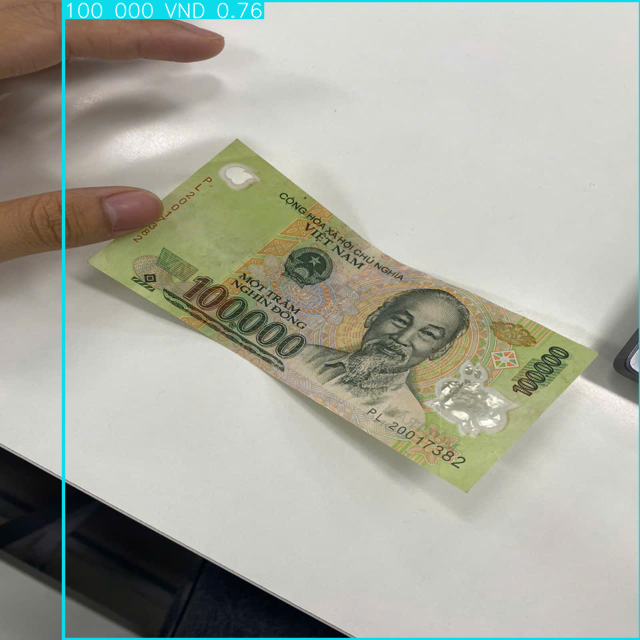

In [74]:
from PIL import Image
from google.colab.patches import cv2_imshow
# Đường dẫn tới bức ảnh cần thử nghiệm
image_path = '/content/drive/MyDrive/Hung/Banknote_Recognition/Testing_Images/100canh.jpg'  # Thay bằng đường dẫn tới ảnh của bạn

# Load the image using PIL
img = Image.open(image_path)

# Resize the image
img = img.resize((640, 640))
results = model(img)
results.show()


# EVALUATE THE MODEL

In [75]:
# --- Ô 1: Chuẩn bị môi trường YOLOv5 ---
import os

# Kiểm tra xem thư mục yolov5 đã tồn tại chưa
if not os.path.exists('yolov5'):
    print("Đang clone repository yolov5...")
    # Tải mã nguồn yolov5 từ GitHub
    !git clone https://github.com/ultralytics/yolov5
else:
    print("Thư mục yolov5 đã tồn tại.")

# Di chuyển vào thư mục yolov5
%cd yolov5

# Cài đặt các thư viện cần thiết từ file requirements.txt của yolov5
print("\nĐang cài đặt các thư viện cần thiết cho yolov5...")
# Thêm các thư viện có thể thiếu cho việc đánh giá/xuất file
!pip install -qr requirements.txt coremltools onnx gsutil # -q để giảm output

# Quay lại thư mục làm việc gốc
%cd ..

print("\nĐã chuẩn bị xong môi trường YOLOv5.")

Đang clone repository yolov5...
Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17320 (from 3)
Receiving objects: 100% (17410/17410), 16.29 MiB | 16.04 MiB/s, done.
Resolving deltas: 100% (11926/11926), done.
/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5/yolov5

Đang cài đặt các thư viện cần thiết cho yolov5...
/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5

Đã chuẩn bị xong môi trường YOLOv5.


In [78]:
# --- Ô 2: Chạy đánh giá bằng val.py (Thêm kiểm tra pwd) ---

# --- !!! KIỂM TRA LẠI CÁC ĐƯỜNG DẪN NÀY !!! ---
weights_path = '/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5/runs/train/exp3/weights/best.pt'
data_yaml_path = '/content/drive/MyDrive/Hung/Banknote_Recognition/Dataset_2/data.yaml' # Đảm bảo đường dẫn là tuyệt đối bên trong file này!
img_size = 640
conf_threshold = 0.001
iou_threshold = 0.6

import os
import traceback
paths_ok = True
# ... (Phần kiểm tra paths_ok giữ nguyên) ...

if paths_ok:
    print("--- Bắt đầu đánh giá ---")
    # Kiểm tra thư mục làm việc hiện tại trước khi chạy script
    print("Thư mục làm việc hiện tại (pwd):")
    !pwd
    print(f"Sẽ chạy script từ: /content/yolov5/val.py") # Script nằm ở /content/yolov5/
    print("Đang chạy script yolov5/val.py...")

    try:
        # Chạy lệnh đánh giá
        !python yolov5/val.py --weights "$weights_path" \
                              --data "$data_yaml_path" \
                              --imgsz $img_size \
                              --conf-thres $conf_threshold \
                              --iou-thres $iou_threshold \
                              --task val \
                              --save-json

        print("\nQuá trình đánh giá bằng val.py đã hoàn tất.")
        print("Kết quả và các tệp chi tiết được lưu trong thư mục 'yolov5/runs/val/exp*'")

    except Exception as e:
        print(f"\nĐã xảy ra lỗi trong quá trình thực thi val.py:")
        traceback.print_exc() # In chi tiết lỗi

else:
    print("\nVui lòng sửa các đường dẫn bị lỗi trước khi chạy lại.")

--- Bắt đầu đánh giá ---
Thư mục làm việc hiện tại (pwd):
/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5
Sẽ chạy script từ: /content/yolov5/val.py
Đang chạy script yolov5/val.py...
val: data=/content/drive/MyDrive/Hung/Banknote_Recognition/Dataset_2/data.yaml, weights=['/content/drive/MyDrive/Hung/Banknote_Recognition/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
100% 755k/755k [00:00<00:00, 115MB/s]
val: Scanning /content/drive/MyDrive/Hung/Banknote_Recognition/Dataset_2/valid/labels... 275 images, 0 backgrounds, 0 co